In [1]:
import numpy as np 
import pandas as pd 
import xgboost as xgb


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Exploration - Selecting Best Dataset by Features

In [ ]:
charles_phenotype_dataset = pd.read_excel('/content/drive/MyDrive/MLF4G Project/SD_PavCA_SampleInfo_PhenotypeInfo.xlsx', 'CharlesRiv - Normalized Phenos')
harlan_phenotype_dataset = pd.read_excel('/content/drive/MyDrive/MLF4G Project/SD_PavCA_SampleInfo_PhenotypeInfo.xlsx', 'Harlan - Normalized Phenos')
filtered_phenotype_dataset = pd.read_excel('/content/drive/MyDrive/MLF4G Project/SD_PavCA_SampleInfo_PhenotypeInfo.xlsx', 'Filtered Samps - Phenos & Covar')


In [ ]:
charles_phenotype_dataset.columns
# len(phenotype_dataset)

Index(['Sample', 'LeverCS_D1', 'MagazineCS_D1', 'MagazineNCS_D1',
       'ProbLever_D1', 'ProbMag_D1', 'AvgLatLev_D1', 'AvgLatMag_D1',
       'ResponseBias_D1', 'ProbDiff_D1',
       ...
       'PC1_AvgLatMag_regressed_normalized',
       'PC1_ResponseBias_regressed_normalized',
       'PC1_ProbDiff_regressed_normalized',
       'PC1_LatencyScore_regressed_normalized',
       'PC1_IndexScore_regressed_normalized',
       'PC1_AllPhenosAndDays_normalized_regressed',
       'PC2_AllPhenosAndDays_normalized_regressed',
       'PC3_AllPhenosAndDays_normalized_regressed',
       'PC4_AllPhenosAndDays_normalized_regressed',
       'PC5_AllPhenosAndDays_normalized_regressed'],
      dtype='object', length=101)

In [ ]:
harlan_phenotype_dataset.columns

Index(['Sample', 'LeverCS_D1', 'MagazineCS_D1', 'MagazineNCS_D1',
       'ProbLever_D1', 'ProbMag_D1', 'AvgLatLev_D1', 'AvgLatMag_D1',
       'ResponseBias_D1', 'ProbDiff_D1',
       ...
       'PC1_AvgLatMag_regressed_normalized',
       'PC1_ResponseBias_regressed_normalized',
       'PC1_ProbDiff_regressed_normalized',
       'PC1_LatencyScore_regressed_normalized',
       'PC1_IndexScore_regressed_normalized',
       'PC1_AllPhenosAndDays_normalized_regressed',
       'PC2_AllPhenosAndDays_normalized_regressed',
       'PC3_AllPhenosAndDays_normalized_regressed',
       'PC4_AllPhenosAndDays_normalized_regressed',
       'PC5_AllPhenosAndDays_normalized_regressed'],
      dtype='object', length=101)

In [ ]:
filtered_phenotype_dataset.columns

Index(['Sample', 'Vendor', 'Vendor Location', 'Barrier', 'Experimenter',
       'Phenotype', 'Birth', 'Training_D1', 'Age', 'Weight', 'Weight_Recorded',
       'Housing', 'Light_Cycle', 'Experimenter_ARY', 'Experimenter_BFS/AA',
       'Experimenter_MLR/LMF', 'Experimenter_BFS', 'Experimenter_AK',
       'Experimenter_KP', 'Experimenter_CJF', 'Experimenter_EGO',
       'Experimenter_JC/JDM', 'Experimenter_AAK', 'Experimenter_CJF/JDM',
       'Experimenter_EGO.1', 'Experimenter_BTS', 'Experimenter_TW/KP',
       'Experimenter_ABK', 'Experimenter_TW', 'Experimenter_JJ',
       'Experimenter_LMY', 'Experimenter_LMY/VL', 'Experimenter_TG/JDM',
       'LeverCS_D1', 'MagazineCS_D1', 'MagazineNCS_D1', 'ProbLever_D1',
       'ProbMag_D1', 'AvgLatLev_D1', 'AvgLatMag_D1', 'ResponseBias_D1',
       'ProbDiff_D1', 'LatencyScore_D1', 'IndexScore_D1', 'LeverCS_D2',
       'MagazineCS_D2', 'MagazineNCS_D2', 'ProbLever_D2', 'ProbMag_D2',
       'AvgLatLev_D2', 'AvgLatMag_D2', 'ResponseBias_D2', 'ProbD

In [ ]:
len(filtered_phenotype_dataset)
len(harlan_phenotype_dataset)
len(charles_phenotype_dataset)


1780

In [ ]:
len(filtered_phenotype_dataset.columns)

99

In [3]:
######## DRYAD Genome-wide association study of behavioral, physiological and gene expression traits in outbred CFW mice #####
cfw_phenotypes = pd.read_csv('/content/drive/MyDrive/MLF4G Project/pheno.csv')

In [4]:
cfw_phenotypes.columns
for c in cfw_phenotypes.columns:
  print(c)

id
round
cageid
FCbox
PPIbox
methcage
methcycle
discard
mixup
earpunch
glucoseage
methage
FCage
PPIage
sacage
bw0
bw1
bw2
bw3
PPIweight
sacweight
BMD
TA
EDL
gastroc
plantaris
soleus
tibia
abnormalbone
experimenters
testisweight
taillength
fastglucose
PreTrainD1
AvToneD1
AvContextD2
AvAltContextD3
AvToneD3
D3.180
D3.240
D3.300
D3.360
p120b1
p120b2
p120b3
p120b4
pp3b1
pp3b2
pp3avg
pp6b1
pp6b2
pp6avg
pp12b1
pp12b2
pp12avg
pp3PPIb1
pp3PPIb2
pp3PPIavg
pp6PPIb1
pp6PPIb2
pp6PPIavg
pp12PPIb1
pp12PPIb2
pp12PPIavg
PPIavg
startle
avgnostim
D1totaldist0to15
D1totaldist15to30
D1totaldist0to30
D2totaldist0to15
D2totaldist15to30
D2totaldist0to30
D3totaldist0to15
D3totaldist15to30
D3totaldist0to30
D1TOTDIST5
D1TOTDIST10
D1TOTDIST15
D1TOTDIST20
D1TOTDIST25
D1TOTDIST30
D2TOTDIST5
D2TOTDIST10
D2TOTDIST15
D2TOTDIST20
D2TOTDIST25
D2TOTDIST30
D3TOTDIST5
D3TOTDIST10
D3TOTDIST15
D3TOTDIST20
D3TOTDIST25
D3TOTDIST30
D1ctrtime0to15
D1ctrtime0to30
D2ctrtime0to15
D2ctrtime0to30
D3ctrtime0to15
D3ctrtime0to30
D1hact

In [4]:
cfw_genotypes = pd.read_csv('/content/drive/MyDrive/MLF4G Project/geno.txt.gz', sep=' ', compression='gzip')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
cfw_genotypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Columns: 92736 entries, id to cfw-19-61107432
dtypes: float64(92458), int64(276), object(2)
memory usage: 821.4+ MB


In [7]:
len(cfw_genotypes)
cfw_genotypes['id']
cfw_phenotypes['id']

0             4368
1            26305
2            26306
3            26307
4            26308
           ...    
1214    43757_rep2
1215    43757_rep3
1216    43757_rep4
1217    43757_rep5
1218    43757_rep6
Name: id, Length: 1219, dtype: object

In [8]:
cfw_phenotypes['TA']
TA_phenotypes = cfw_phenotypes.copy(deep=True)
TA_phenotypes = TA_phenotypes[['id', 'TA']]
TA_phenotypes = TA_phenotypes.dropna()
print(TA_phenotypes)

         id    TA
1     26305  74.6
2     26306  62.3
3     26307  54.1
4     26308  56.5
5     26309  64.0
...     ...   ...
1203  47069  64.3
1204  47070  46.5
1205  47071  53.7
1206  47072  63.5
1207  47073  63.1

[1172 rows x 2 columns]


[[49.9992126   0.1834311 ]
 [66.52924528  0.1916022 ]
 [58.20860034  0.18734165]]


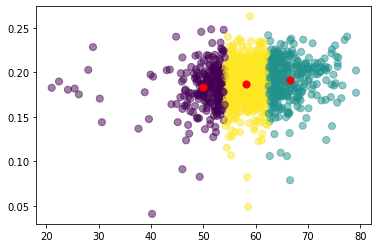

In [ ]:
### Exploratory analysis on the phenotypic data - look for interesting clusters / phenomena

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


df = cfw_phenotypes[['TA', 'testisweight']] #modify the variables for clustering heree
df = df.dropna()

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['TA'], df['testisweight'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [5]:
## Review data struture for genotypic data
cfw_genotypes

,id,discard,cfw-1-3082859,cfw-1-3207478,cfw-1-3284999,cfw-1-4056451,rs241840178,cfw-1-4592184,rs214108183,rs31954814,...,rs239202862,cfw-19-60773695,rs212272420,rs51223003,rs30736750,rs30654044,rs30990073,rs50978457,rs51755773,cfw-19-61107432
0,26305,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000,...,2.000,2.000,2.000,0.0,0.0,2.0,2.000,2.000,0.000,0.000
1,26306,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,1.929,1.980,1.999,0.0,0.0,2.0,1.964,1.689,1.781,0.254
2,26307,no,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.000,...,1.933,1.603,1.993,0.0,0.0,2.0,1.492,1.793,1.538,0.526
3,26308,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776,...,2.000,2.000,2.000,0.0,0.0,2.0,2.000,2.000,1.000,0.000
4,26309,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,2.000,2.000,2.000,0.0,0.0,2.0,2.000,2.000,2.000,0.361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,47069,no,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.000,...,2.000,2.000,2.000,0.0,0.0,2.0,2.000,2.000,1.499,0.499
1157,47070,no,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.000,...,2.000,2.000,2.000,1.0,1.0,1.0,2.000,2.000,0.005,0.996
1158,47071,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000,...,2.000,1.000,2.000,0.0,0.0,2.0,2.000,2.000,2.000,0.000
1159,47072,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.005,...,1.886,1.776,2.000,0.0,0.0,2.0,1.838,2.000,1.567,0.193


In [6]:
## Proof of concept run for a single phenotype label
cfw_TA_Y = cfw_phenotypes[['id','TA']]

cfw_TA_Y=cfw_TA_Y.apply(pd.to_numeric, errors='coerce')

# Validation checks
print(type(cfw_TA_Y['id'][0]))
cfw_TA_Y.loc[cfw_TA_Y.id == 26305]
geno_X = cfw_genotypes.copy()
print(type(geno_X['id'][0]))
geno_X.loc[geno_X.id == 26305]
# geno_X

<class 'numpy.float64'>
<class 'int'>


,id,discard,cfw-1-3082859,cfw-1-3207478,cfw-1-3284999,cfw-1-4056451,rs241840178,cfw-1-4592184,rs214108183,rs31954814,...,rs239202862,cfw-19-60773695,rs212272420,rs51223003,rs30736750,rs30654044,rs30990073,rs50978457,rs51755773,cfw-19-61107432
0,26305,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0


In [7]:
geno_X

,id,discard,cfw-1-3082859,cfw-1-3207478,cfw-1-3284999,cfw-1-4056451,rs241840178,cfw-1-4592184,rs214108183,rs31954814,...,rs239202862,cfw-19-60773695,rs212272420,rs51223003,rs30736750,rs30654044,rs30990073,rs50978457,rs51755773,cfw-19-61107432
0,26305,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000,...,2.000,2.000,2.000,0.0,0.0,2.0,2.000,2.000,0.000,0.000
1,26306,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,1.929,1.980,1.999,0.0,0.0,2.0,1.964,1.689,1.781,0.254
2,26307,no,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.000,...,1.933,1.603,1.993,0.0,0.0,2.0,1.492,1.793,1.538,0.526
3,26308,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776,...,2.000,2.000,2.000,0.0,0.0,2.0,2.000,2.000,1.000,0.000
4,26309,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,2.000,2.000,2.000,0.0,0.0,2.0,2.000,2.000,2.000,0.361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,47069,no,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.000,...,2.000,2.000,2.000,0.0,0.0,2.0,2.000,2.000,1.499,0.499
1157,47070,no,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.000,...,2.000,2.000,2.000,1.0,1.0,1.0,2.000,2.000,0.005,0.996
1158,47071,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000,...,2.000,1.000,2.000,0.0,0.0,2.0,2.000,2.000,2.000,0.000
1159,47072,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.005,...,1.886,1.776,2.000,0.0,0.0,2.0,1.838,2.000,1.567,0.193


In [20]:
## pandas merge acts as a join, so we can ensure all genotype data matches the phenotype labels, and then process, sample, and remove as necessary
combined = pd.merge(geno_X, cfw_TA_Y, how='inner', on='id')

In [21]:
combined

,id,discard,cfw-1-3082859,cfw-1-3207478,cfw-1-3284999,cfw-1-4056451,rs241840178,cfw-1-4592184,rs214108183,rs31954814,...,cfw-19-60773695,rs212272420,rs51223003,rs30736750,rs30654044,rs30990073,rs50978457,rs51755773,cfw-19-61107432,TA
0,26305,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000,...,2.000,2.000,0.0,0.0,2.0,2.000,2.000,0.000,0.000,74.6
1,26306,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,1.980,1.999,0.0,0.0,2.0,1.964,1.689,1.781,0.254,62.3
2,26307,no,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.000,...,1.603,1.993,0.0,0.0,2.0,1.492,1.793,1.538,0.526,54.1
3,26308,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776,...,2.000,2.000,0.0,0.0,2.0,2.000,2.000,1.000,0.000,56.5
4,26309,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,2.000,2.000,0.0,0.0,2.0,2.000,2.000,2.000,0.361,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,47069,no,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.000,...,2.000,2.000,0.0,0.0,2.0,2.000,2.000,1.499,0.499,64.3
1125,47070,no,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.000,...,2.000,2.000,1.0,1.0,1.0,2.000,2.000,0.005,0.996,46.5
1126,47071,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000,...,1.000,2.000,0.0,0.0,2.0,2.000,2.000,2.000,0.000,53.7
1127,47072,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.005,...,1.776,2.000,0.0,0.0,2.0,1.838,2.000,1.567,0.193,63.5


In [22]:
train_dataset = combined.copy()

In [23]:
train_dataset = train_dataset.loc[train_dataset.discard == 'no'].dropna().drop(columns=['discard'])

In [24]:
train_dataset = train_dataset.set_index('id')

,cfw-1-3082859,cfw-1-3207478,cfw-1-3284999,cfw-1-4056451,rs241840178,cfw-1-4592184,rs214108183,rs31954814,rs31947195,rs30660852,...,cfw-19-60773695,rs212272420,rs51223003,rs30736750,rs30654044,rs30990073,rs50978457,rs51755773,cfw-19-61107432,TA
id,,,,,,,,,,,,,,,,,,,,,
26305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000,0.000,0.000,...,2.000,2.000,0.0,0.0,2.0,2.000,2.000,0.000,0.000,74.6
26306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2.000,2.000,...,1.980,1.999,0.0,0.0,2.0,1.964,1.689,1.781,0.254,62.3
26307,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.000,2.000,2.000,...,1.603,1.993,0.0,0.0,2.0,1.492,1.793,1.538,0.526,54.1
26308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776,2.000,2.000,...,2.000,2.000,0.0,0.0,2.0,2.000,2.000,1.000,0.000,56.5
26309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2.000,2.000,...,2.000,2.000,0.0,0.0,2.0,2.000,2.000,2.000,0.361,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47069,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.000,2.000,2.000,...,2.000,2.000,0.0,0.0,2.0,2.000,2.000,1.499,0.499,64.3
47070,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.000,2.000,2.000,...,2.000,2.000,1.0,1.0,1.0,2.000,2.000,0.005,0.996,46.5
47071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000,2.000,2.000,...,1.000,2.000,0.0,0.0,2.0,2.000,2.000,2.000,0.000,53.7


In [26]:
train_dataset_X = train_dataset.drop(columns=['TA'])

In [27]:
train_dataset_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 26305 to 47073
Columns: 92734 entries, cfw-1-3082859 to cfw-19-61107432
dtypes: float64(92458), int64(276)
memory usage: 789.6 MB


In [28]:
train_dataset_Y = train_dataset[['TA']]

In [29]:
train_dataset_Y

,TA
id,
26305,74.6
26306,62.3
26307,54.1
26308,56.5
26309,64.0
...,...
47069,64.3
47070,46.5
47071,53.7


In [31]:
## For first trait, run hyper parameter analysis on small subset of total data
hyper_train_Y = train_dataset_Y.head(150)
hyper_train_X = train_dataset_X.head(150)

In [34]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor()

#=========================================================================
# search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [2, 3],
              "n_estimators": [10, 100],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(hyper_train_X, hyper_train_Y)

print("The best hyperparameters are ",search.best_params_)

[21:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

KeyboardInterrupt: ignored

In [35]:
# regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
#                            n_estimators  = search.best_params_["n_estimators"],
#                            max_depth     = search.best_params_["max_depth"],)

# Or, manually supply values here
regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 50,
                           max_depth     = 3,)

# Train the xgboost regression
regressor.fit(train_dataset_X, train_dataset_Y)


# then perform a test/train split 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_dataset_X,train_dataset_Y, test_size = 0.2)
regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)



[21:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.015, n_estimators=50)

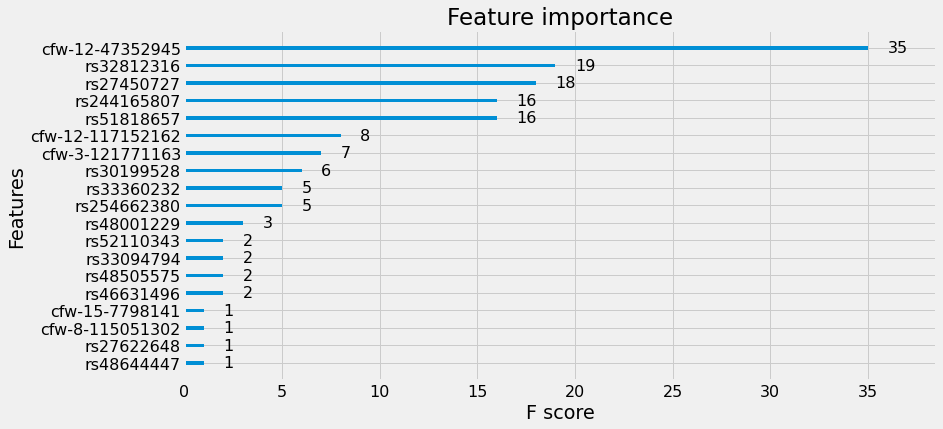

In [36]:
## Visualize initial results for simple muscle weight of TA muslce
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=30, ax=ax)
plt.show();

In [ ]:
## Now, productionize the above process on our target feature - muscle weight / total body weight

In [38]:
# Muscles from dataset are TA, EDL, gastroc, plantaris, soleus: Measured weights of each (in mg).

In [8]:
## Proof of concept run for a single phenotype label
muscle_dataset_Y = cfw_phenotypes[['id','TA','gastroc', 'plantaris', 'soleus', 'sacweight']].dropna()

# Create our feature value column wise for each row
muscle_dataset_Y['muscle_feature'] = (muscle_dataset_Y['TA'] + muscle_dataset_Y['gastroc'] + muscle_dataset_Y['plantaris'] + muscle_dataset_Y['soleus']) / muscle_dataset_Y['sacweight']

# process all rows to correct format
muscle_dataset_Y = muscle_dataset_Y.apply(pd.to_numeric, errors='coerce')

In [42]:
muscle_dataset_Y

,id,TA,gastroc,plantaris,soleus,sacweight,muscle_feature
1,26305,74.6,194.8,23.2,15.0,46.6,6.600858
2,26306,62.3,154.6,18.8,8.5,35.7,6.840336
3,26307,54.1,143.6,17.6,6.8,34.1,6.513196
4,26308,56.5,148.6,17.7,8.7,41.8,5.538278
5,26309,64.0,157.4,20.6,9.2,39.5,6.359494
...,...,...,...,...,...,...,...
1203,47069,64.3,149.6,15.1,10.2,43.8,5.461187
1204,47070,46.5,118.5,17.9,8.1,35.0,5.457143
1205,47071,53.7,140.7,17.0,10.8,38.9,5.712082
1206,47072,63.5,158.3,21.5,7.4,41.0,6.114634


In [9]:
## pandas merge acts as a join, so we can ensure all genotype data matches the phenotype labels, and then process, sample, and remove as necessary
muscle_feat_combined = pd.merge(geno_X, muscle_dataset_Y, how='inner', on='id')

In [10]:
muscle_train_dataset = muscle_feat_combined.loc[muscle_feat_combined.discard == 'no'].dropna().drop(columns=['discard'])


In [11]:
muscle_train_dataset = muscle_train_dataset.set_index('id')

In [12]:
# Filter down label dataset to only combined musculature (sum(muscle weight / body weight)) feature
muscle_train_Y = muscle_train_dataset[['muscle_feature']]

In [13]:
muscle_train_X = muscle_train_dataset.drop(columns=['TA','gastroc', 'plantaris', 'soleus', 'sacweight', 'muscle_feature'])

id
26305    0.0
26306    0.0
26307    0.0
26308    0.0
26309    0.0
        ... 
47069    0.0
47070    0.0
47071    0.0
47072    0.0
47073    0.0
Name: cfw-1-3082859, Length: 1072, dtype: float64

In [65]:
## Run grid search on data subset for hyper parameter tuning

hyper_train_X = muscle_train_X.head(200)
hyper_train_Y = muscle_train_Y.head(200)

#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
prod_regressor=xgb.XGBRegressor()

#=========================================================================
# search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [2, 3],
              "n_estimators": [10, 100, 200],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
prod_search = GridSearchCV(prod_regressor, param_grid, cv=5).fit(hyper_train_X, hyper_train_Y)

print("The best hyperparameters are ",prod_search.best_params_)

[02:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

KeyboardInterrupt: ignored

In [68]:
# For our production muscularization feature, we will use best fit hyperparameters
# prod_regressor=xgb.XGBRegressor(learning_rate = prod_search.best_params_["learning_rate"],
#                            n_estimators  = prod_search.best_params_["n_estimators"],
#                            max_depth     = prod_search.best_params_["max_depth"],)

# Saved here for reference (no need to re-run)
regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 200,
                           max_depth     = 3,)

# Train the xgboost regression
prod_regressor.fit(muscle_train_X, muscle_train_Y)

# Now run cross validation to complete analysis

# first perform a test/train split 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(muscle_train_X,muscle_train_Y, test_size = 0.2)
prod_regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

[03:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

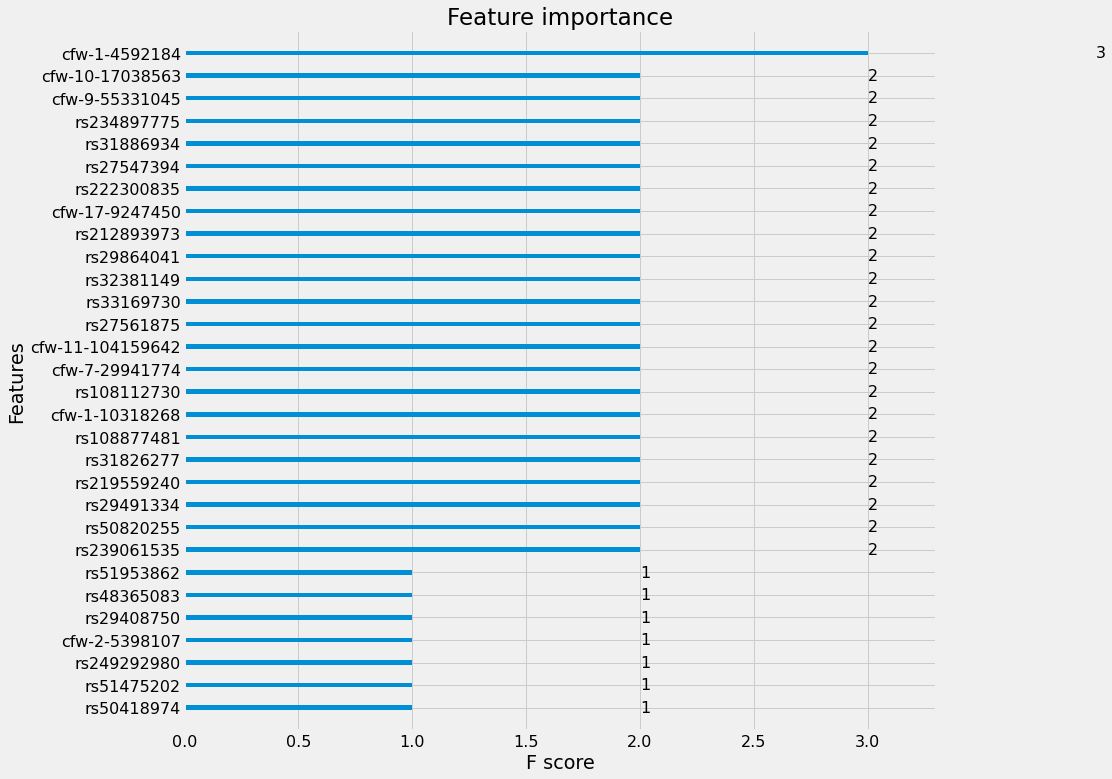

In [69]:
## Visualize production results for simple muscle weight composite feature 
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,12))
plot_importance(prod_regressor, max_num_features=30, ax=ax)
plt.show();

In [72]:
## Transform output to pandas to get ranked list of our features
xgboost_output = prod_regressor.get_booster().get_score() 
print(xgboost_output)

xgb_feature_ranked = sorted(xgboost_output.items(), key=lambda x: x[1], reverse=True)
print(xgb_feature_ranked[:-1])

{'rs226331019': 1, 'rs239061535': 2, 'rs211730569': 1, 'rs30020801': 1, 'rs50820255': 2, 'rs47534182': 1, 'rs47361737': 1, 'cfw-1-152173206': 1, 'cfw-4-132319352': 1, 'rs36759003': 1, 'rs31640940': 1, 'rs31464669': 1, 'rs27024442': 1, 'rs223534079': 1, 'rs259851145': 1, 'rs30036219': 1, 'rs218228966': 1, 'cfw-8-94386025': 1, 'rs32678912': 1, 'rs234543931': 1, 'rs264102305': 1, 'cfw-12-42792729': 1, 'rs29491334': 2, 'rs224260224': 1, 'rs219857746': 1, 'rs249132675': 1, 'rs3708091': 1, 'rs219559240': 2, 'rs108193619': 1, 'rs252963185': 1, 'rs30932669': 1, 'cfw-2-25374375': 1, 'rs31826277': 2, 'rs52567465': 1, 'rs32487450': 1, 'rs225249055': 1, 'rs33837098': 1, 'cfw-12-111336222': 1, 'rs33681621': 1, 'rs108877481': 2, 'rs50979569': 1, 'rs262092439': 1, 'cfw-1-10318268': 2, 'rs218368584': 1, 'rs29138423': 1, 'rs235221902': 1, 'rs234531054': 1, 'rs48197932': 1, 'rs255937639': 1, 'rs32875886': 1, 'rs108112730': 2, 'rs46498812': 1, 'cfw-7-28091123': 1, 'cfw-8-123148490': 1, 'cfw-7-29941774': 

In [64]:
xgb_feature_ranked

NameError: ignored

# Sparse Linear Regression Section - Lasso Analysis


In [51]:
## Leverage same datasets as above, and confirm / compare to sparse linear regression with lasso
## Will utilize SKlearn lasso model for speed and accuracy
from sklearn import linear_model
# first, we will try a lasso model with a hand-chosen alpha coeff. Later, will try hyper parameter analysis
# lasso = linear_model.Lasso(alpha=0.1, fit_intercept=False, tol = 0.001)
lasso = linear_model.Lasso(alpha=0.1, fit_intercept=False, tol = 0.001)

In [52]:
lasso.fit(muscle_train_X, muscle_train_Y)

Lasso(alpha=0.1, fit_intercept=False, tol=0.001)

In [16]:
pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
lasso.score(muscle_train_X, muscle_train_Y)

0.18361278528119152

In [54]:
import eli5
eli5.show_weights(lasso, top=-1, feature_names = muscle_train_X.columns.tolist())

Weight?,Feature
+0.186,rs251052943
+0.184,rs33718007
+0.147,rs251967121
+0.116,rs32735435
+0.095,rs51986934
+0.072,rs50315903
+0.071,rs226658089
+0.064,rs30749914
+0.061,rs30408290
+0.059,rs31547180


In [63]:
# Transform lasso feature results to dataFrame
lasso_feat = pd.DataFrame(data=lasso.coef_, index=muscle_train_X.columns.tolist())
lasso_feat[0]['cfw-6-134229589']

0.05336671619992302

Lasso Regression - Cross Validation and Hyper Parameter Tuning

In [61]:
## Leverage open source LassoCV implementation, which automatically calculates 
## hyperparameters based on cross validation (cv) with split of our choosing
from sklearn.linear_model import LassoCV

# choose 5 (20%) splits for data, same as xgboost
lasso_cv = LassoCV(cv=5, fit_intercept=False, n_alphas=10, tol=.001)

In [62]:
lasso_cv.fit(muscle_train_X, muscle_train_Y)
lasso_cv.score(muscle_train_X, muscle_train_Y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

# **Final Analysis - Combined Candidate SNPs**



In [75]:
## Filter the lasso results to select only the positively correlated significant features
valid_lasso_feat = lasso_feat.loc[lasso_feat[0] > 0]

In [80]:
valid_lasso_dict = valid_lasso_feat.to_dict()[0]
print(valid_lasso_dict)

{'rs31995638': 0.011456009056226802, 'rs251967121': 0.1470994573304816, 'rs31547180': 0.05917486243590103, 'rs31458392': 0.0002649828916398345, 'rs48820946': 0.010367209412055177, 'rs32314536': 0.040702076244601565, 'rs50654531': 0.010766809979275965, 'rs30722809': 0.002137006179969977, 'rs50315903': 0.07241131984616504, 'rs32332387': 0.030070060931929828, 'rs37035088': 0.011587326465750484, 'rs31450686': 0.005956316520894769, 'rs251052943': 0.18648789659947926, 'rs31396208': 0.03882237036876851, 'rs49636305': 0.0015933700710938, 'rs33391256': 0.04228462261472342, 'rs32311005': 0.012204893173929504, 'rs30606000': 0.05416959607124611, 'rs31669735': 0.013175563726994266, 'rs48460498': 0.004978608223518897, 'rs51986934': 0.0954707910166467, 'rs237981658': 0.00218787714535721, 'rs33067543': 0.016089386929016004, 'rs33061672': 0.011744260636661326, 'rs32321394': 0.01857089600958856, 'rs30408290': 0.0613478631063128, 'rs32497994': 0.016091683528219033, 'rs108709452': 0.023549436669959505, 'r

In [81]:
print(f"There are {len(valid_lasso_dict)} potentially impactful SNPs for muscle development identified by Lasso regression!")

There are 133 potentially impactful SNPs identified by Lasso regression!


In [82]:
## Similarly we have already processed our XGBoost feature list above
print(f"There are {len(xgb_feature_ranked)} potentially impactful SNPs for muscle development identified by gradient descent (XGBoost)")

There are 247 potentially impactful SNPs for muscle development identified by gradient descent (XGBoost)


In [90]:
## How much overlap did we find?
overlap = set()
for tup in xgb_feature_ranked:
  if tup[0] in valid_lasso_dict:
    overlap.add(tup[0])

print(len(overlap))
print(overlap)

6
{'rs230877014', 'rs33438717', 'rs252963185', 'rs33891824', 'rs49101559', 'rs108709452'}


In [91]:
## Total SNP Universe
total_snps = set()
for tup in xgb_feature_ranked:
  total_snps.add(tup[0])

for key in valid_lasso_dict.keys():
  total_snps.add(key)

print(len(total_snps))
print(total_snps)

374
{'rs51986934', 'rs48460498', 'rs33154094', 'rs226658089', 'cfw-14-70941809', 'rs50979569', 'rs29408750', 'rs31458392', 'rs31886934', 'rs261200357', 'rs223534079', 'cfw-3-79535580', 'rs31947195', 'rs255937639', 'rs31464669', 'rs248969990', 'rs218228966', 'cfw-11-40517739', 'rs213813907', 'rs49012817', 'rs254439674', 'rs27331729', 'rs256993560', 'rs222240416', 'rs30404890', 'rs49467189', 'rs46793171', 'rs31996932', 'rs31669735', 'cfw-2-16111858', 'rs30040381', 'rs49423964', 'rs32311005', 'rs33359494', 'cfw-1-185060409', 'rs245443200', 'rs49619300', 'rs37035088', 'rs31000825', 'rs31233799', 'cfw-3-34784984', 'cfw-12-103517803', 'rs47141308', 'rs29173759', 'rs219378841', 'rs52370957', 'rs49796372', 'rs247345922', 'rs32735435', 'rs45843037', 'rs31450686', 'rs46060616', 'rs33061672', 'cfw-17-9247450', 'cfw-17-80232092', 'rs49101559', 'rs225998135', 'rs236278260', 'rs33457034', 'rs48803417', 'rs31151339', 'rs45639244', 'rs31396208', 'rs31890645', 'rs256639215', 'rs30408290', 'rs46648603',

In [95]:
high_conviction_snps = pd.DataFrame(data = list(overlap), columns=['SNPs associated with high musculature to body weight ratio'])
high_conviction_snps

,SNPs associated with high musculature to body weight ratio
0,rs230877014
1,rs33438717
2,rs252963185
3,rs33891824
4,rs49101559
5,rs108709452


In [96]:
lower_conviction_snps = pd.DataFrame(data = list(total_snps), columns=['SNPs associated with high musculature to body weight ratio'])
lower_conviction_snps

,SNPs associated with high musculature to body weight ratio
0,rs51986934
1,rs48460498
2,rs33154094
3,rs226658089
4,cfw-14-70941809
...,...
369,rs230877014
370,rs31756832
371,rs213603130
372,rs31755852


In [97]:
lower_conviction_snps.to_csv('/content/drive/MyDrive/MLF4G Project/Musculature_SNPs_Total.csv')

In [98]:
high_conviction_snps.to_csv('/content/drive/MyDrive/MLF4G Project/High_Conviction_Musculature_SNPs_Total.csv')